In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
election=pd.read_csv("ElectionData.csv")

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
election.head()

,TimeElapsed,time,territory,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12


In [5]:
election.tail()

,TimeElapsed,time,territory,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
21638,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,2.08,51.04,348061,177647,4235,2.22,3632,1.9,51.28,371931,190712,NC,0,0.19,0.20,332,0,0
21639,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,2.08,51.04,348061,177647,4235,2.22,3632,1.9,51.28,371931,190712,PNR,0,0.18,0.19,326,0,0
21640,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,2.08,51.04,348061,177647,4235,2.22,3632,1.9,51.28,371931,190712,MPT,0,0.14,0.15,256,0,0
21641,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,2.08,51.04,348061,177647,4235,2.22,3632,1.9,51.28,371931,190712,PTP,0,0.13,0.14,239,0,0
21642,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,2.08,51.04,348061,177647,4235,2.22,3632,1.9,51.28,371931,190712,JPP,0,0.07,0.07,118,0,0


In [6]:
election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 28 columns):
TimeElapsed                 21643 non-null int64
time                        21643 non-null object
territory                   21643 non-null object
totalMandates               21643 non-null int64
availableMandates           21643 non-null int64
numParishes                 21643 non-null int64
numParishesApproved         21643 non-null int64
blankVotes                  21643 non-null int64
blankVotesPercentage        21643 non-null float64
nullVotes                   21643 non-null int64
nullVotesPercentage         21643 non-null float64
votersPercentage            21643 non-null float64
subscribedVoters            21643 non-null int64
totalVoters                 21643 non-null int64
pre.blankVotes              21643 non-null int64
pre.blankVotesPercentage    21643 non-null float64
pre.nullVotes               21643 non-null int64
pre.nullVotesPercentage     21643 non-null float

In [7]:
election.shape

(21643, 28)

In [8]:
election.isna().sum()

TimeElapsed                 0
time                        0
territory                   0
totalMandates               0
availableMandates           0
numParishes                 0
numParishesApproved         0
blankVotes                  0
blankVotesPercentage        0
nullVotes                   0
nullVotesPercentage         0
votersPercentage            0
subscribedVoters            0
totalVoters                 0
pre.blankVotes              0
pre.blankVotesPercentage    0
pre.nullVotes               0
pre.nullVotesPercentage     0
pre.votersPercentage        0
pre.subscribedVoters        0
pre.totalVoters             0
Party                       0
Mandates                    0
Percentage                  0
validVotesPercentage        0
Votes                       0
Hondt                       0
FinalMandates               0
dtype: int64

In [9]:
election.describe()

,TimeElapsed,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
count,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,2.164300e+04,2.164300e+04,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,2.164300e+04,2.164300e+04,21643.000000,21643.000000,21643.000000,2.164300e+04,21643.000000,21643.000000
mean,133.146052,11.544795,11.499284,309.956013,261.090237,8875.066673,2.621629,6148.068752,1.961471,51.983722,6.275367e+05,3.390741e+05,7608.001386,2.071985,5914.629950,1.777442,54.549372,6.378503e+05,3.594932e+05,0.565495,4.968484,5.207232,1.585209e+04,1.126138,1.126138
std,77.651193,31.314567,31.738783,659.055911,583.377428,21484.874088,0.795289,14735.469269,0.375250,4.854380,1.525590e+06,8.290404e+05,18493.107257,0.518025,14236.038023,0.388798,4.964948,1.544418e+06,8.763729e+05,4.421804,10.379967,10.881108,9.310605e+04,6.293552,6.872644
min,0.000000,0.000000,0.000000,54.000000,3.000000,19.000000,0.530000,39.000000,1.340000,35.980000,5.767000e+03,2.833000e+03,32.000000,0.800000,40.000000,1.140000,40.870000,6.383000e+03,3.215000e+03,0.000000,0.020000,0.020000,1.000000e+00,0.000000,0.000000
25%,65.000000,1.000000,0.000000,75.000000,67.000000,1188.000000,2.230000,1094.000000,1.720000,50.290000,1.229870e+05,6.267100e+04,1130.000000,1.740000,1124.000000,1.520000,51.210000,1.289260e+05,6.964400e+04,0.000000,0.220000,0.230000,2.360000e+02,0.000000,0.000000
50%,135.000000,4.000000,3.000000,147.000000,120.000000,2998.000000,2.640000,2232.000000,1.870000,53.130000,2.289540e+05,1.060120e+05,2595.000000,2.030000,2141.000000,1.690000,56.260000,2.284970e+05,1.102730e+05,0.000000,0.620000,0.650000,7.900000e+02,0.000000,0.000000
75%,200.000000,9.000000,9.000000,242.000000,208.000000,6889.000000,2.980000,4121.000000,2.230000,54.550000,3.804890e+05,2.069180e+05,5929.000000,2.370000,3967.000000,1.970000,58.220000,3.933140e+05,2.276200e+05,0.000000,3.010000,3.160000,4.510000e+03,0.000000,0.000000
max,265.000000,226.000000,226.000000,3092.000000,3092.000000,129599.000000,5.460000,88539.000000,3.350000,59.870000,9.343084e+06,5.092424e+06,112666.000000,3.660000,86473.000000,3.120000,62.580000,9.439701e+06,5.380451e+06,106.000000,49.110000,51.420000,1.866407e+06,94.000000,106.000000


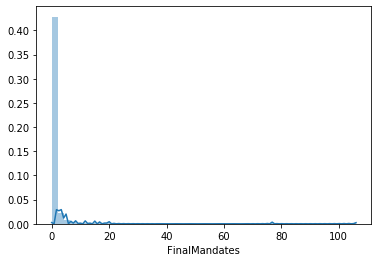

In [10]:
sns.distplot(election["FinalMandates"])

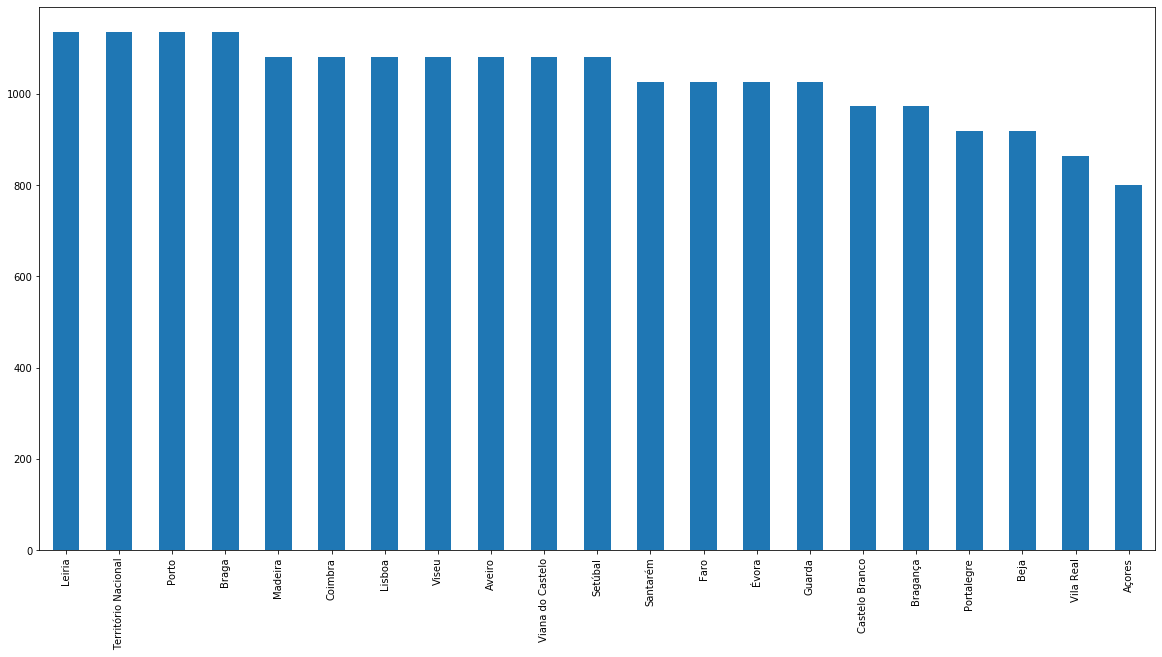

In [11]:
election['territory'].value_counts().plot(kind='bar', figsize=(20,10))

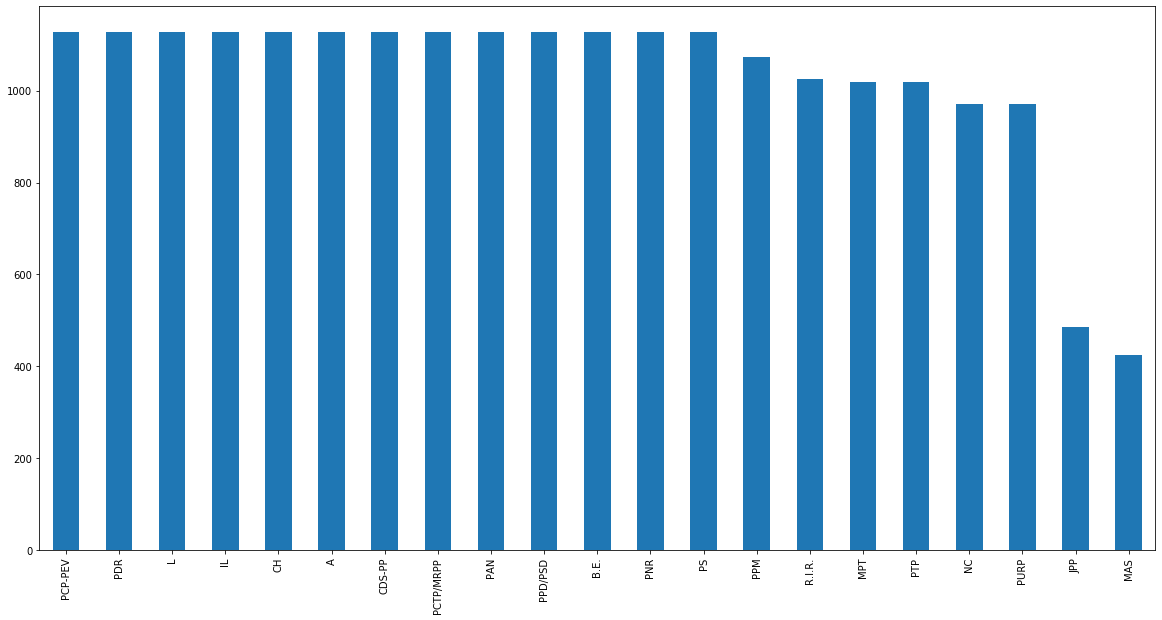

In [12]:
election['Party'].value_counts().plot(kind='bar', figsize=(20,10))

<function matplotlib.pyplot.show(*args, **kw)>

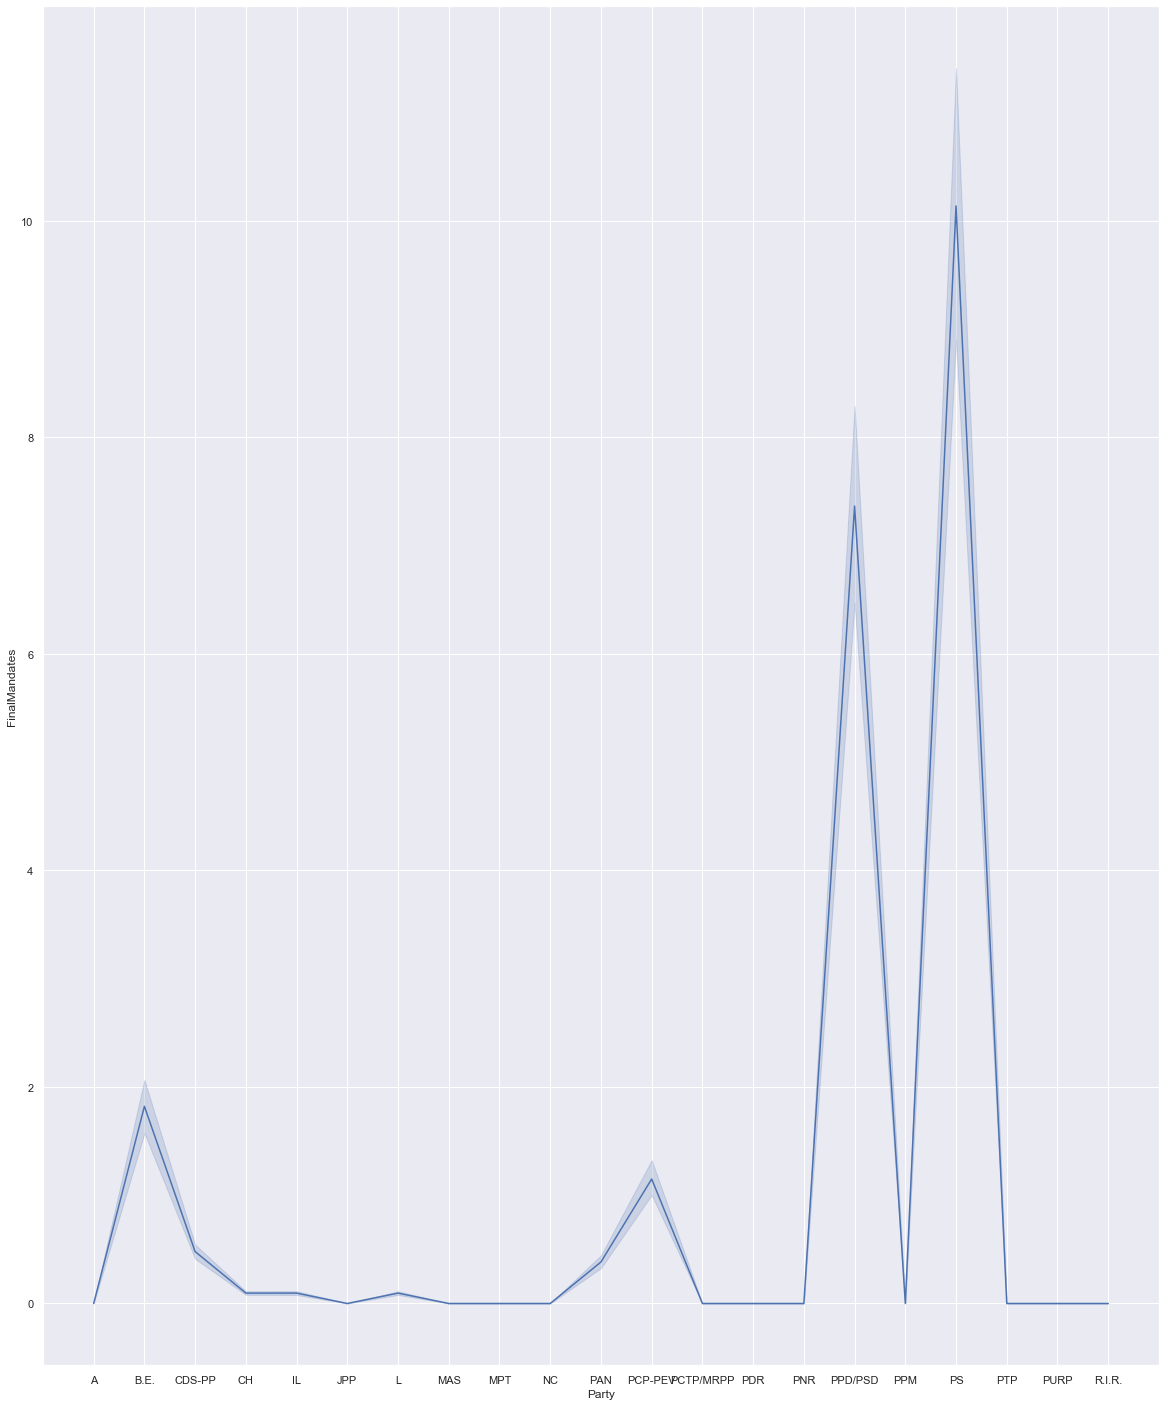

In [13]:
sns.set(rc={"figure.figsize":(20,25)})
sns.lineplot(x="Party",y="FinalMandates",data=election)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

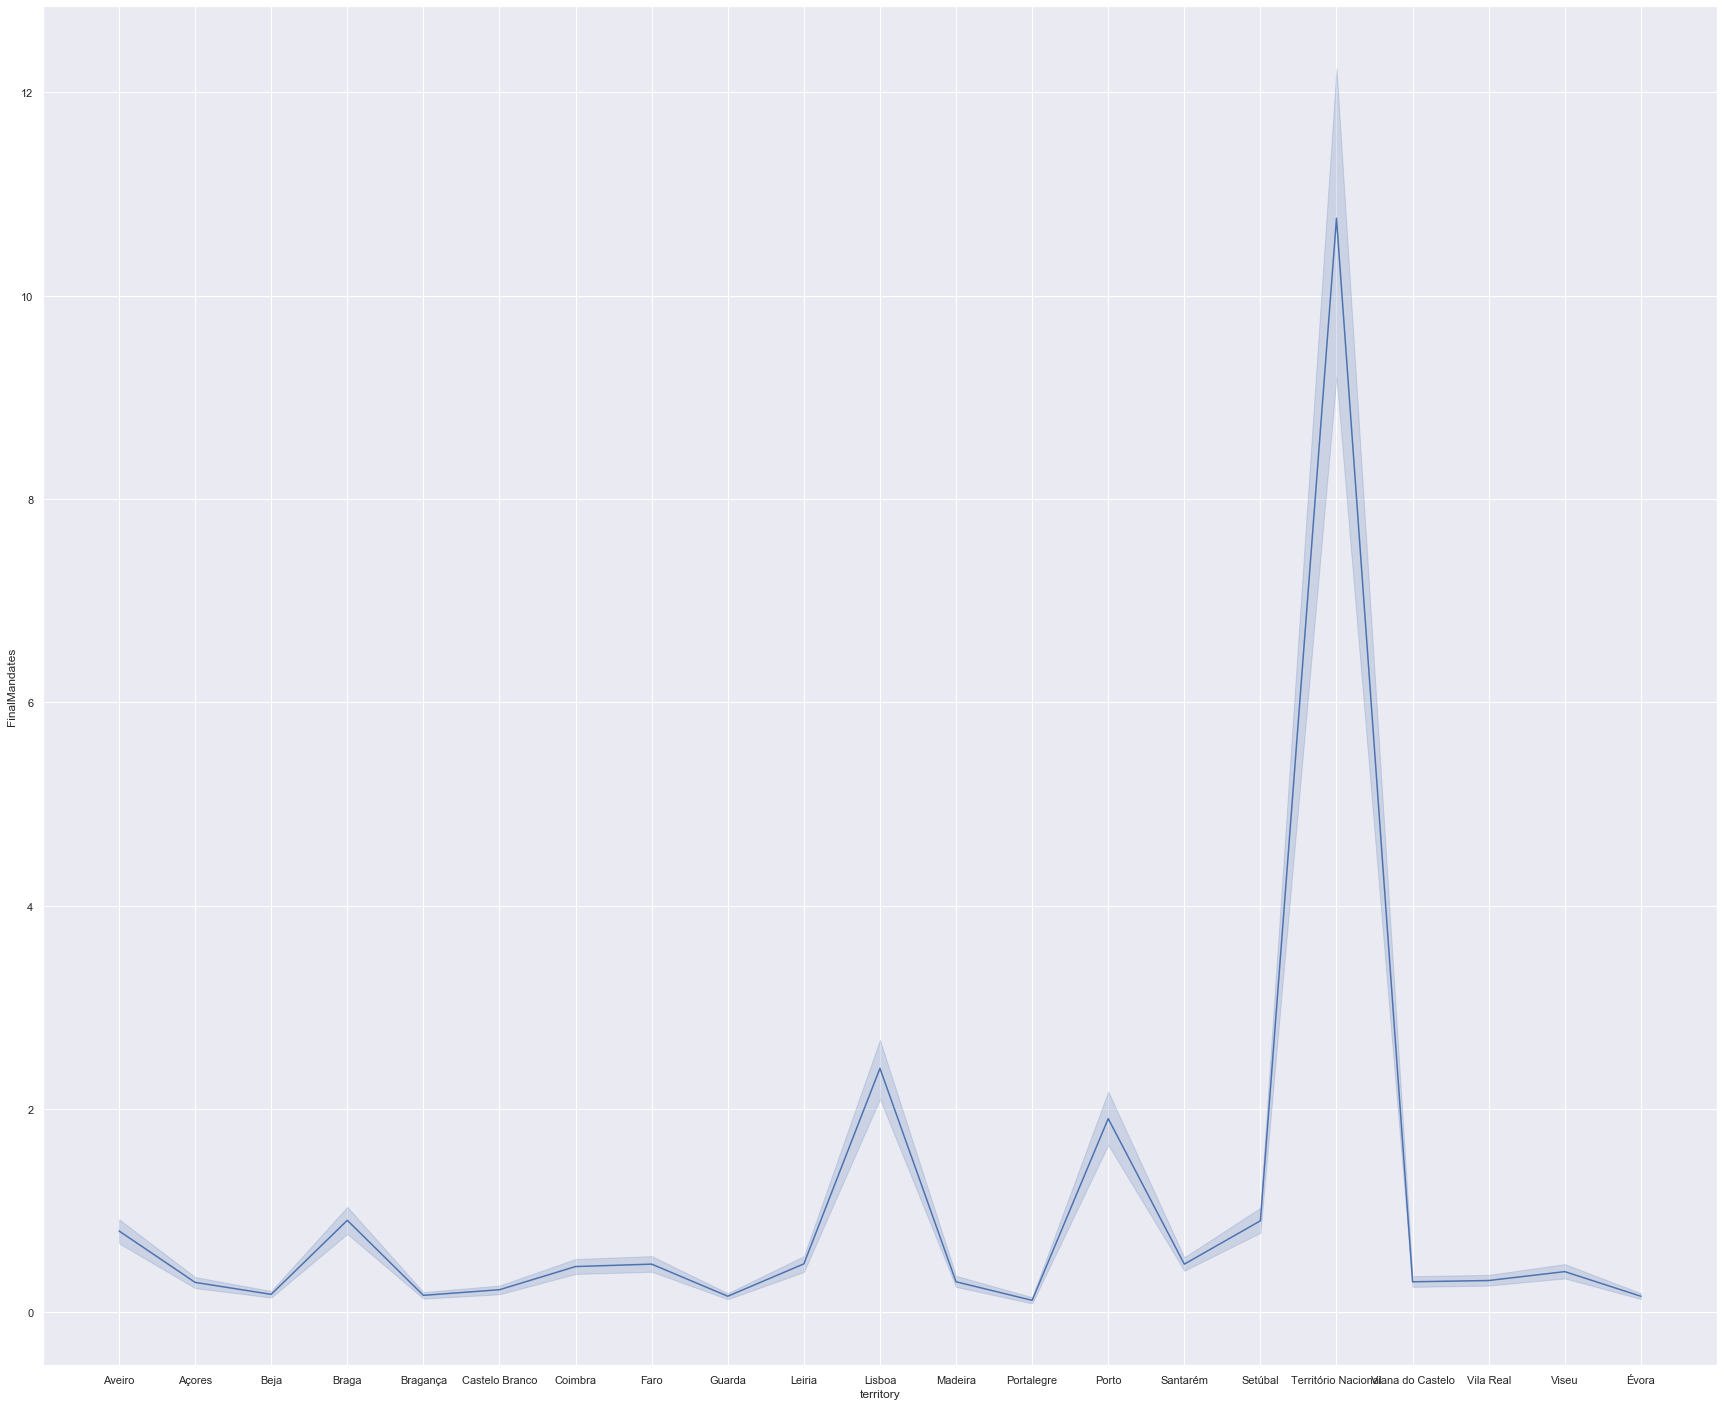

In [14]:
sns.set(rc={"figure.figsize":(30,25)})
sns.lineplot(x="territory",y="FinalMandates",data=election)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

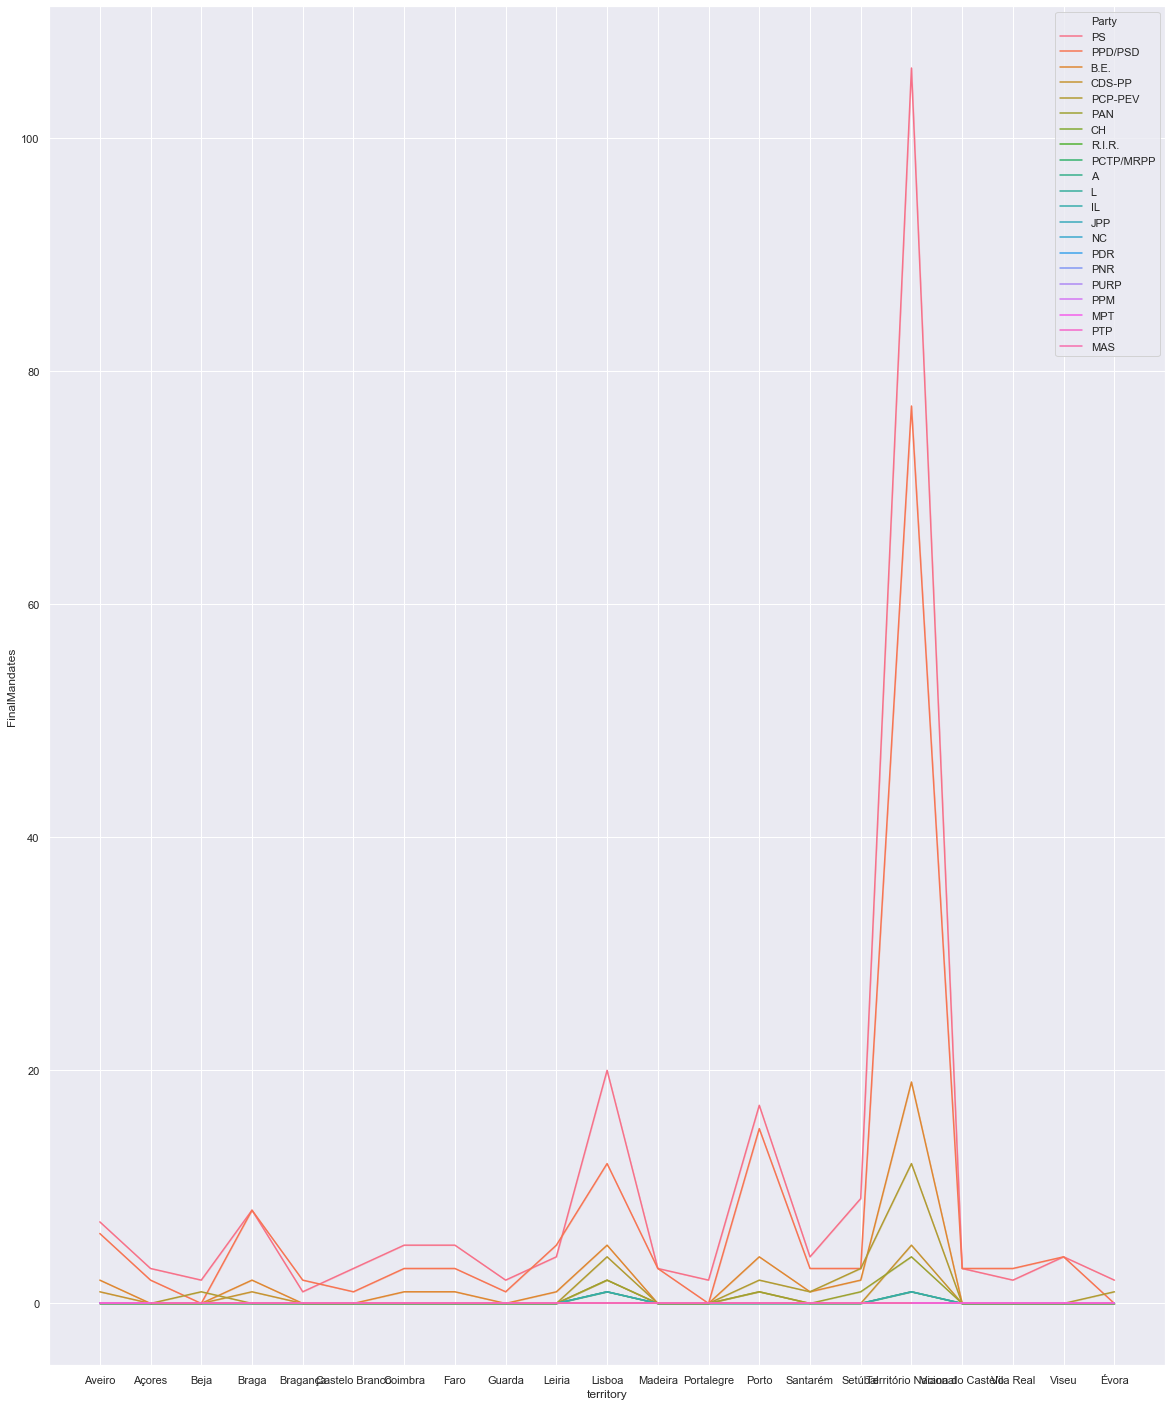

In [15]:
sns.set(rc={"figure.figsize":(20,25)})
sns.lineplot(x="territory",y="FinalMandates",hue="Party",data=election)
plt.show

In [16]:
election['time'] = pd.to_datetime(election.time)

In [17]:
election['year'] = election['time'].dt.year 
election['month'] = election['time'].dt.month 
election['day'] = election['time'].dt.day 
election['hour'] =election['time'].dt.hour 
election['minute'] = election['time'].dt.minute 

In [18]:
df=election.select_dtypes(include=[np.object])
df.columns

Index(['territory', 'Party'], dtype='object')

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cat=['territory', 'Party']
for val in cat:
    le=LabelEncoder()
    election[val]=le.fit_transform(election[val].astype("str"))
election.head()

,TimeElapsed,time,territory,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates,year,month,day,hour,minute
0,0,2019-10-06 20:10:02,16,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,17,0,38.29,40.22,147993,94,106,2019,10,6,20,10
1,0,2019-10-06 20:10:02,16,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,15,0,33.28,34.95,128624,81,77,2019,10,6,20,10
2,0,2019-10-06 20:10:02,16,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,1,0,6.81,7.15,26307,16,19,2019,10,6,20,10
3,0,2019-10-06 20:10:02,16,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,2,0,4.90,5.14,18923,12,5,2019,10,6,20,10
4,0,2019-10-06 20:10:02,16,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497,8317,1.94,8171,1.91,52.66,813743,428546,11,0,4.59,4.83,17757,11,12,2019,10,6,20,10


In [20]:
election['TimeElapsed']=(election['TimeElapsed']-election['TimeElapsed'].min())/(election['TimeElapsed'].max()-election['TimeElapsed'].min())
election['totalMandates']=(election['totalMandates']-election['totalMandates'].min())/(election['totalMandates'].max()-election['totalMandates'].min())
election['availableMandates']=(election['availableMandates']-election['availableMandates'].min())/(election['availableMandates'].max()-election['availableMandates'].min())
election['numParishes']=(election['numParishes']-election['numParishes'].min())/(election['numParishes'].max()-election['numParishes'].min())
election['blankVotes']=(election['blankVotes']-election['blankVotes'].min())/(election['blankVotes'].max()-election['blankVotes'].min())
election['nullVotes']=(election['nullVotes']-election['nullVotes'].min())/(election['nullVotes'].max()-election['nullVotes'].min())
election['votersPercentage']=(election['votersPercentage']-election['votersPercentage'].min())/(election['votersPercentage'].max()-election['votersPercentage'].min())
election['subscribedVoters']=(election['subscribedVoters']-election['subscribedVoters'].min())/(election['subscribedVoters'].max()-election['subscribedVoters'].min())
election['totalVoters']=(election['totalVoters']-election['totalVoters'].min())/(election['totalVoters'].max()-election['totalVoters'].min())
election['pre.blankVotes']=(election['pre.blankVotes']-election['pre.blankVotes'].min())/(election['pre.blankVotes'].max()-election['pre.blankVotes'].min())
election['pre.nullVotes']=(election['pre.nullVotes']-election['pre.nullVotes'].min())/(election['pre.nullVotes'].max()-election['pre.nullVotes'].min())
election['pre.votersPercentage']=(election['pre.votersPercentage']-election['pre.votersPercentage'].min())/(election['pre.votersPercentage'].max()-election['pre.votersPercentage'].min())
election['pre.subscribedVoters']=(election['pre.subscribedVoters']-election['pre.subscribedVoters'].min())/(election['pre.subscribedVoters'].max()-election['pre.subscribedVoters'].min())
election['pre.totalVoters']=(election['pre.totalVoters']-election['pre.totalVoters'].min())/(election['pre.totalVoters'].max()-election['pre.totalVoters'].min())
election['Mandates']=(election['Mandates']-election['Mandates'].min())/(election['Mandates'].max()-election['Mandates'].min())
election['Percentage']=(election['Percentage']-election['Percentage'].min())/(election['Percentage'].max()-election['Percentage'].min())
election['validVotesPercentage']=(election['validVotesPercentage']-election['validVotesPercentage'].min())/(election['validVotesPercentage'].max()-election['validVotesPercentage'].min())
election['Votes']=(election['Votes']-election['Votes'].min())/(election['Votes'].max()-election['Votes'].min())
election['Hondt']=(election['Hondt']-election['Hondt'].min())/(election['Hondt'].max()-election['Hondt'].min())
election['FinalMandates']=(election['FinalMandates']-election['FinalMandates'].min())/(election['FinalMandates'].max()-election['FinalMandates'].min())

In [21]:
election.drop(['time'],axis=1,inplace=True)

In [22]:
election.head()

,TimeElapsed,territory,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates,year,month,day,hour,minute
0,0.0,16,0.0,1.0,1.0,1081,0.07434,2.5,0.099831,2.3,0.643784,0.079976,0.075382,0.073557,1.94,0.094073,1.91,0.543068,0.085586,0.079098,17,0.0,0.779589,0.782101,0.079293,1.000000,1.000000,2019,10,6,20,10
1,0.0,16,0.0,1.0,1.0,1081,0.07434,2.5,0.099831,2.3,0.643784,0.079976,0.075382,0.073557,1.94,0.094073,1.91,0.543068,0.085586,0.079098,15,0.0,0.677531,0.679572,0.068915,0.861702,0.726415,2019,10,6,20,10
2,0.0,16,0.0,1.0,1.0,1081,0.07434,2.5,0.099831,2.3,0.643784,0.079976,0.075382,0.073557,1.94,0.094073,1.91,0.543068,0.085586,0.079098,1,0.0,0.138317,0.138716,0.014094,0.170213,0.179245,2019,10,6,20,10
3,0.0,16,0.0,1.0,1.0,1081,0.07434,2.5,0.099831,2.3,0.643784,0.079976,0.075382,0.073557,1.94,0.094073,1.91,0.543068,0.085586,0.079098,2,0.0,0.099409,0.099611,0.010138,0.127660,0.047170,2019,10,6,20,10
4,0.0,16,0.0,1.0,1.0,1081,0.07434,2.5,0.099831,2.3,0.643784,0.079976,0.075382,0.073557,1.94,0.094073,1.91,0.543068,0.085586,0.079098,11,0.0,0.093094,0.093580,0.009513,0.117021,0.113208,2019,10,6,20,10


In [23]:
X= election.drop(['FinalMandates'], axis = 1)
print(X.shape)

(21643, 31)


In [24]:
y =election['FinalMandates'] 
print(y.shape)

(21643,)


In [25]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X= sc.fit_transform(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state= 52)

In [29]:
lr=LinearRegression()
la=Lasso()
en=ElasticNet()
ri=Ridge()
kn=KNeighborsRegressor()
dt=DecisionTreeRegressor()
ab=AdaBoostRegressor()
rf=RandomForestRegressor()
gb=GradientBoostingRegressor()

models=[]
models.append(("LinearRegression",lr))
models.append(("Lasso",la))
models.append(("ElasticNet",en))
models.append(("Ridge",ri))
models.append(("KNeighborsRegressor",kn))
models.append(("DecisionTreeRegressor",dt))
models.append(("AdaBoostRegressor",ab))
models.append(("RandomForestRegressor",rf))
models.append(("GradientBoostingRegressor",gb))

model=[]
R2_score=[]
cvs=[]
MSE=[]
for i,model in models:
    print("-------------------",model,"----------------------")
    print("\n")
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    r2=r2_score(y_test,pred)
    print("R2_score: ",r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pred)
    print("MSE: ",mse)
    MSE.append(mse)
    score=cross_val_score(model,X,y,cv=10,scoring='r2').mean()
    print("Cross Validation: ",score)
    cvs.append(score)
    print("\n")

------------------- LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) ----------------------


R2_score:  0.9922574488332433
MSE:  3.0241320559468385e-05
Cross Validation:  0.9925356866112395


------------------- Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) ----------------------


R2_score:  -3.4422724845439845e-05
MSE:  0.0039059944063363976
Cross Validation:  -6.172907452346443e-05


------------------- ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False) ----------------------


R2_score:  -3.4422724845439845e-05
MSE:  0.0039059944063363976
Cross Validation:  -6.172907452346443e-05


------------------- Ridge(alpha=1.0, copy_X=True,

I Choose AdaBoostRegressor as my final model because it perform very well on our dataset and also has good R2 score,
less Mean_Squared_Error and Good Cross_val_score.

R2_score:  0.9969149807469498

MSE:  1.2049653163958833e-05

Cross Validation:  0.9965810433202605


In [31]:
from sklearn.externals import joblib

joblib.dump(ab,'election_joblib')

['election_joblib']